### E-COMMERCE CHURN: DEVELOPED BY AMY CORONA 

#### In this workbook, we will explore ecommerce churn using EDA and Sklearn, resulting in a model that can predict churn with 90% accuracy!

#### If you like this workbook, please give it an upvote!

* [Exploratory Data Analysis](#section-one)
* [Random Forrest Classifier (90% Accuracy!)](#section-two)
    - [Feature Importance (Tenure explains 47% of churn!)](#subsection-one)
    - [ROC Curve](#anything-you-like)
* [Conclusion](#section-three)

Introduction:
In today's competitive landscape, customer retention plays a crucial role in the success of any business. Recognizing the importance of identifying customers who are likely to churn, a leading online E-Commerce company has provided us with a dataset to develop a predictive model that can accurately forecast customer churn. The objective is to enable the company to proactively approach customers and offer targeted promotions to prevent churn.

Dataset Description:
The dataset we have at our disposal belongs to the aforementioned online E-Commerce company. It encompasses a range of customer attributes, including tenure, preferred login device, city tier, warehouse-to-home distance, preferred payment mode, gender, hours spent on the app, number of devices registered, preferred order category, satisfaction score, marital status, number of addresses, complaints, order amount hike from last year, coupon usage, order count, days since the last order, and cashback amount.

Methodology:
To tackle this predictive challenge, we have employed the Random Forest classifier, a powerful machine learning algorithm known for its ability to handle complex datasets and provide accurate predictions. By leveraging an ensemble of decision trees, Random Forest combines the strength of multiple models to achieve robust and reliable results.

<a id="section-one"></a>

### Let's perform some Exploratory Data Analysis (EDA) to get familiar with the data!

In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx


In [105]:
df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [106]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [107]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [108]:
df['Churn']

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [109]:
df = df.copy().dropna()

In [110]:
#We are going to drop all lines with missing data. Another option would be do use medians. 

df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [111]:
#Using label encoder for categorical variables

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


df['PreferredLoginDevice'] = le.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = le.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = le.fit_transform(df['Gender'])
df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split

x = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<a id="section-two"></a>

## The random forrest classifier predicts Churn accurately over 90% of the time!

In [113]:
#instantiate an instance of the random forrest classifier, fit the model, and make a prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

In [114]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(rf_clf.score(x_test, y_test), 4):.2%}")

Accuracy: 90.07%


<a id="subsection-one"></a>

## This will give us a better understanding of each features importance.

### Tenure explains 46.67% of churn

In [139]:
for name, score in zip(x.columns, rf_clf.feature_importances_):
    print(f"{score:.2%}",":",name)

46.67% : Tenure
1.12% : PreferredLoginDevice
1.00% : CityTier
3.64% : WarehouseToHome
1.45% : PreferredPaymentMode
0.21% : Gender
0.29% : HourSpendOnApp
3.29% : NumberOfDeviceRegistered
5.42% : PreferedOrderCat
2.28% : SatisfactionScore
4.35% : MaritalStatus
4.80% : NumberOfAddress
11.89% : Complain
1.58% : OrderAmountHikeFromlastYear
0.71% : CouponUsed
1.81% : OrderCount
5.86% : DaySinceLastOrder
3.63% : CashbackAmount


## Let's try some other models and see if we can outperform the random forrest classifier!

In [115]:
#instantiate an instance of the bagging classifier, fit the model, and make a prediction

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

bag_clf.fit(x_train, y_train)

y_pred_bag = bag_clf.predict(x_test)

In [116]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(bag_clf.score(x_test, y_test), 4):.2%}")

Accuracy: 89.80%


In [117]:
#the random forrest and bagging classifier have almost identical predictions, agreeing 97.6% of the time
print("How do often do the random forrest and bagging classifier predict the same?:", f"{np.sum(y_pred == y_pred_bag) / len(y_pred):.2%}" " of the time.")

How do often do the random forrest and bagging classifier predict the same?: 97.62% of the time.


In [118]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [119]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(clf.score(x_test, y_test), 4):.2%}")

Accuracy: 87.15%


<a id="anything-you-like"></a>

## The random forrest classifier is still the most accurate, let's plot an ROC curve!

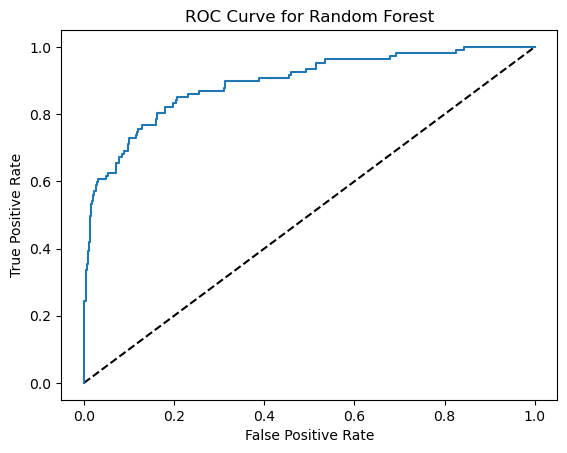

In [120]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_prob = rf_clf.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

<a id="section-three"></a>
## Conclusion

This project has focused on developing a Random Forest classifier to predict customer churn in the online E-Commerce industry. By analyzing a comprehensive dataset provided by a leading E-Commerce company, we aimed to identify the most influential features and create a model that can accurately forecast customer churn.

Our results have demonstrated a high level of accuracy, with the Random Forest classifier achieving a prediction accuracy of 90%. Additionally, we have identified the feature importance within the dataset, with the highest importance assigned to "Tenure" (46.67%). It is noteworthy that the remaining features collectively contribute to the prediction power, ensuring a comprehensive analysis.

The implications of our project are significant for the online E-Commerce company. By leveraging the predictive power of the Random Forest classifier, the company can proactively identify customers who are likely to churn and implement targeted strategies to retain them. This approach has the potential to increase customer loyalty, improve customer satisfaction, and boost overall business revenue.

In the future, further enhancements could be explored, such as feature engineering, hyperparameter tuning, and model optimization, to potentially improve the performance of the Random Forest classifier even further. Additionally, deploying the model in a production environment would enable real-time churn prediction and facilitate timely interventions by the company.

Ultimately, the successful application of the Random Forest classifier in predicting customer churn underscores the value of data-driven approaches in understanding and addressing customer behavior. By harnessing the power of machine learning and predictive analytics, businesses can proactively tackle customer churn and drive sustainable growth in today's dynamic marketplace.